In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def chebyshev_nodes(n: int) -> np.array:
    x = np.zeros(n)

    for k in range(n):
        x[k] = np.cos(((2*k + 1)/(2*n))*np.pi)

    return x


def runge_function(x: np.array) -> np.array:
    return 1/(1 + 25*x**2)


x = chebyshev_nodes(11)
y = runge_function(x)
print(x)
print(y)

[ 9.89821442e-01  9.09631995e-01  7.55749574e-01  5.40640817e-01
  2.81732557e-01  6.12323400e-17 -2.81732557e-01 -5.40640817e-01
 -7.55749574e-01 -9.09631995e-01 -9.89821442e-01]
[0.03922544 0.04611321 0.06544959 0.12037588 0.33508349 1.
 0.33508349 0.12037588 0.06544959 0.04611321 0.03922544]


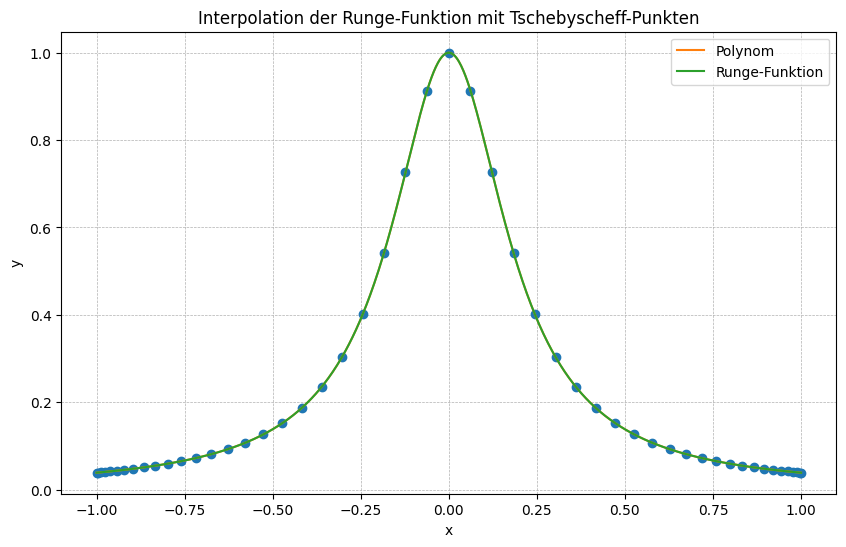

In [6]:
def lagrange_base(x: np.array, x0: float) -> np.array:
    n = x.size
    base = np.ones(n)
    for i in range(n):
        for j in range(n):
            if i != j:
              base[i] *= (x0 - x[j])/(x[i]-x[j])

    return base


def lagrange(x: np.array, y:np.array, x0: float) -> float:
    n = x.size
    base = lagrange_base(x, x0)
    l = 0
    for i in range(n):
        l += base[i]*y[i]

    return l


x = chebyshev_nodes(51)
y = runge_function(x)
x_grid = np.linspace(-1,1,1000)
k = x_grid.size
results = np.zeros(1000)
for i in range(1000):
    results[i] = lagrange(x,y,x_grid[i])

y_runge = runge_function(x_grid)

plt.figure(figsize=(10, 6))
plt.plot(x,y, "o")
plt.plot(x_grid,results, label="Polynom")
plt.plot(x_grid,y_runge, label="Runge-Funktion")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.title("Interpolation der Runge-Funktion mit Tschebyscheff-Punkten")
plt.show()
